In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import reg
ister_matplotlib_converters
register_matplotlib_converters()


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("/home/hp/Téléchargements/fcc-forum-pageviews.csv",index_col='date')


In [44]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [45]:
df.size

1304

In [46]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [47]:
df.size

1238

In [111]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

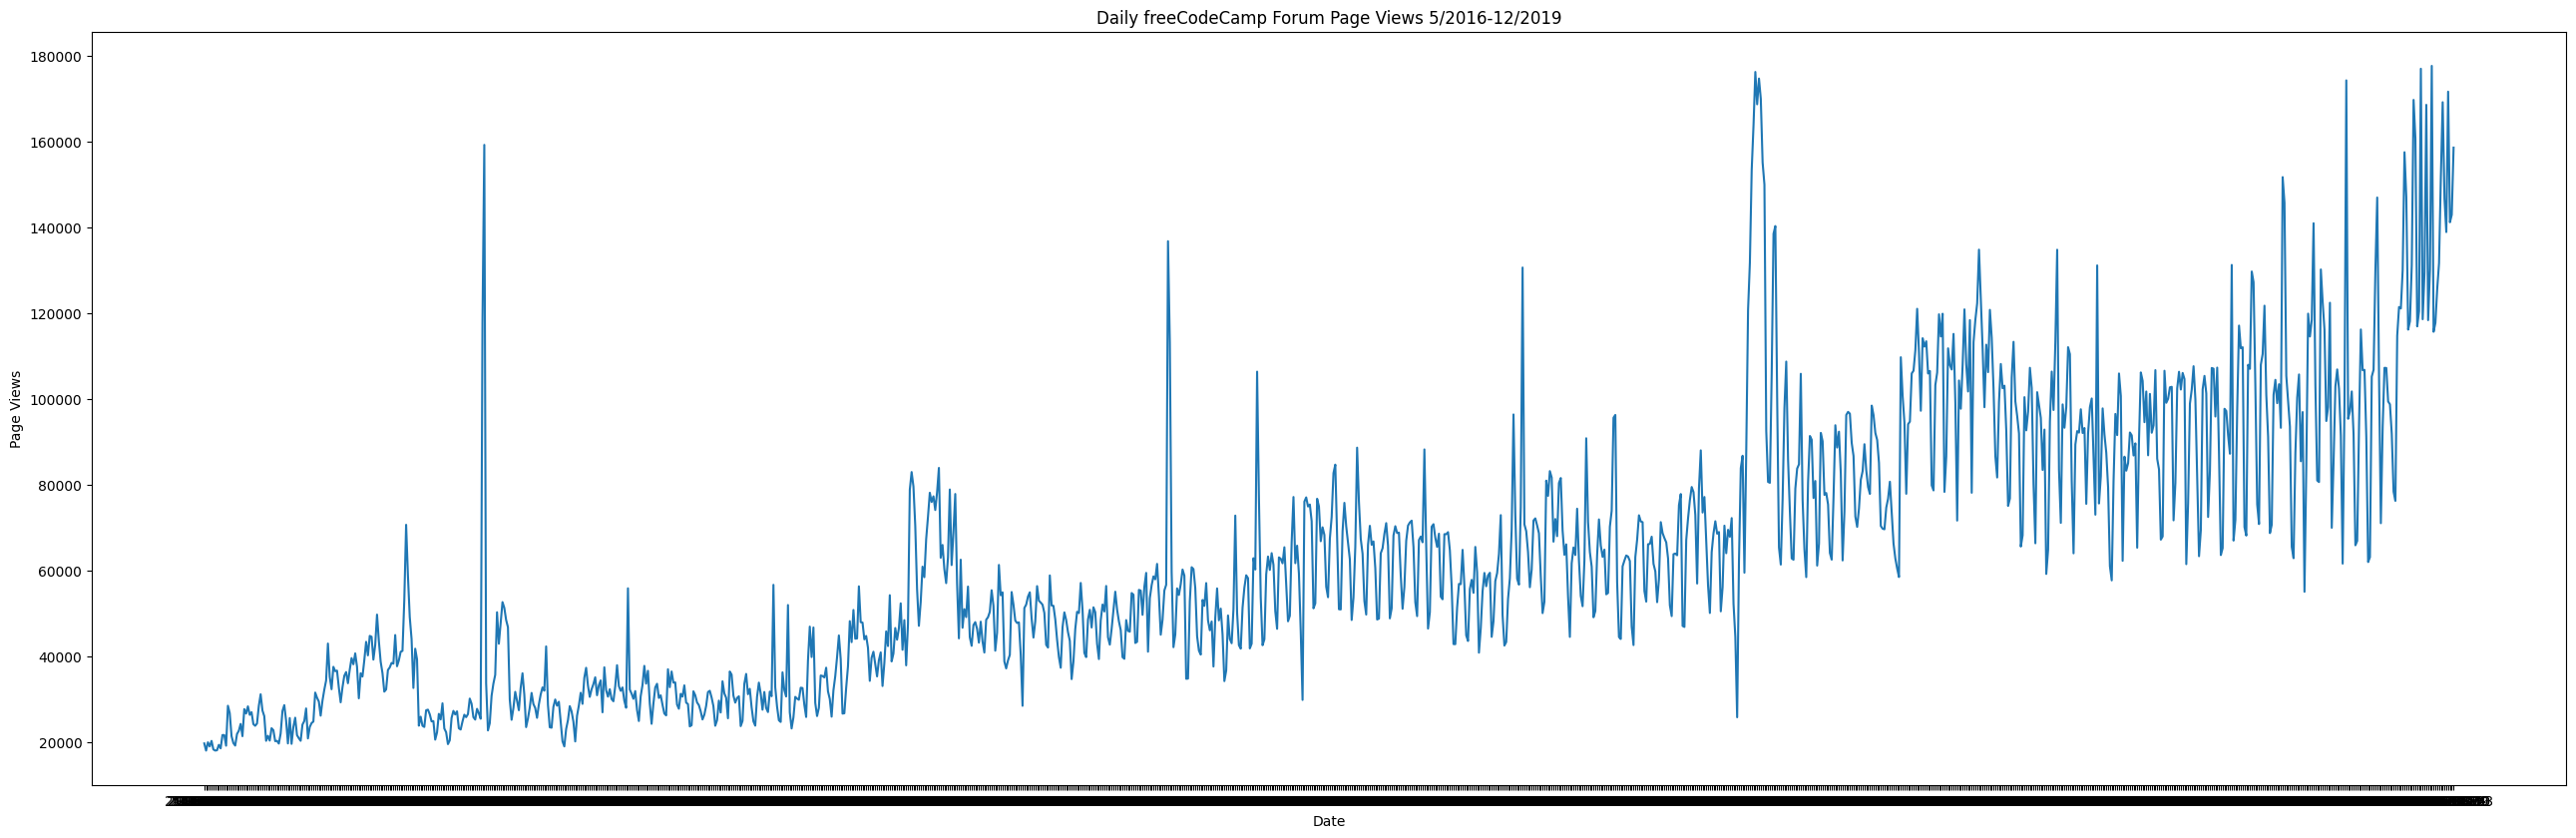

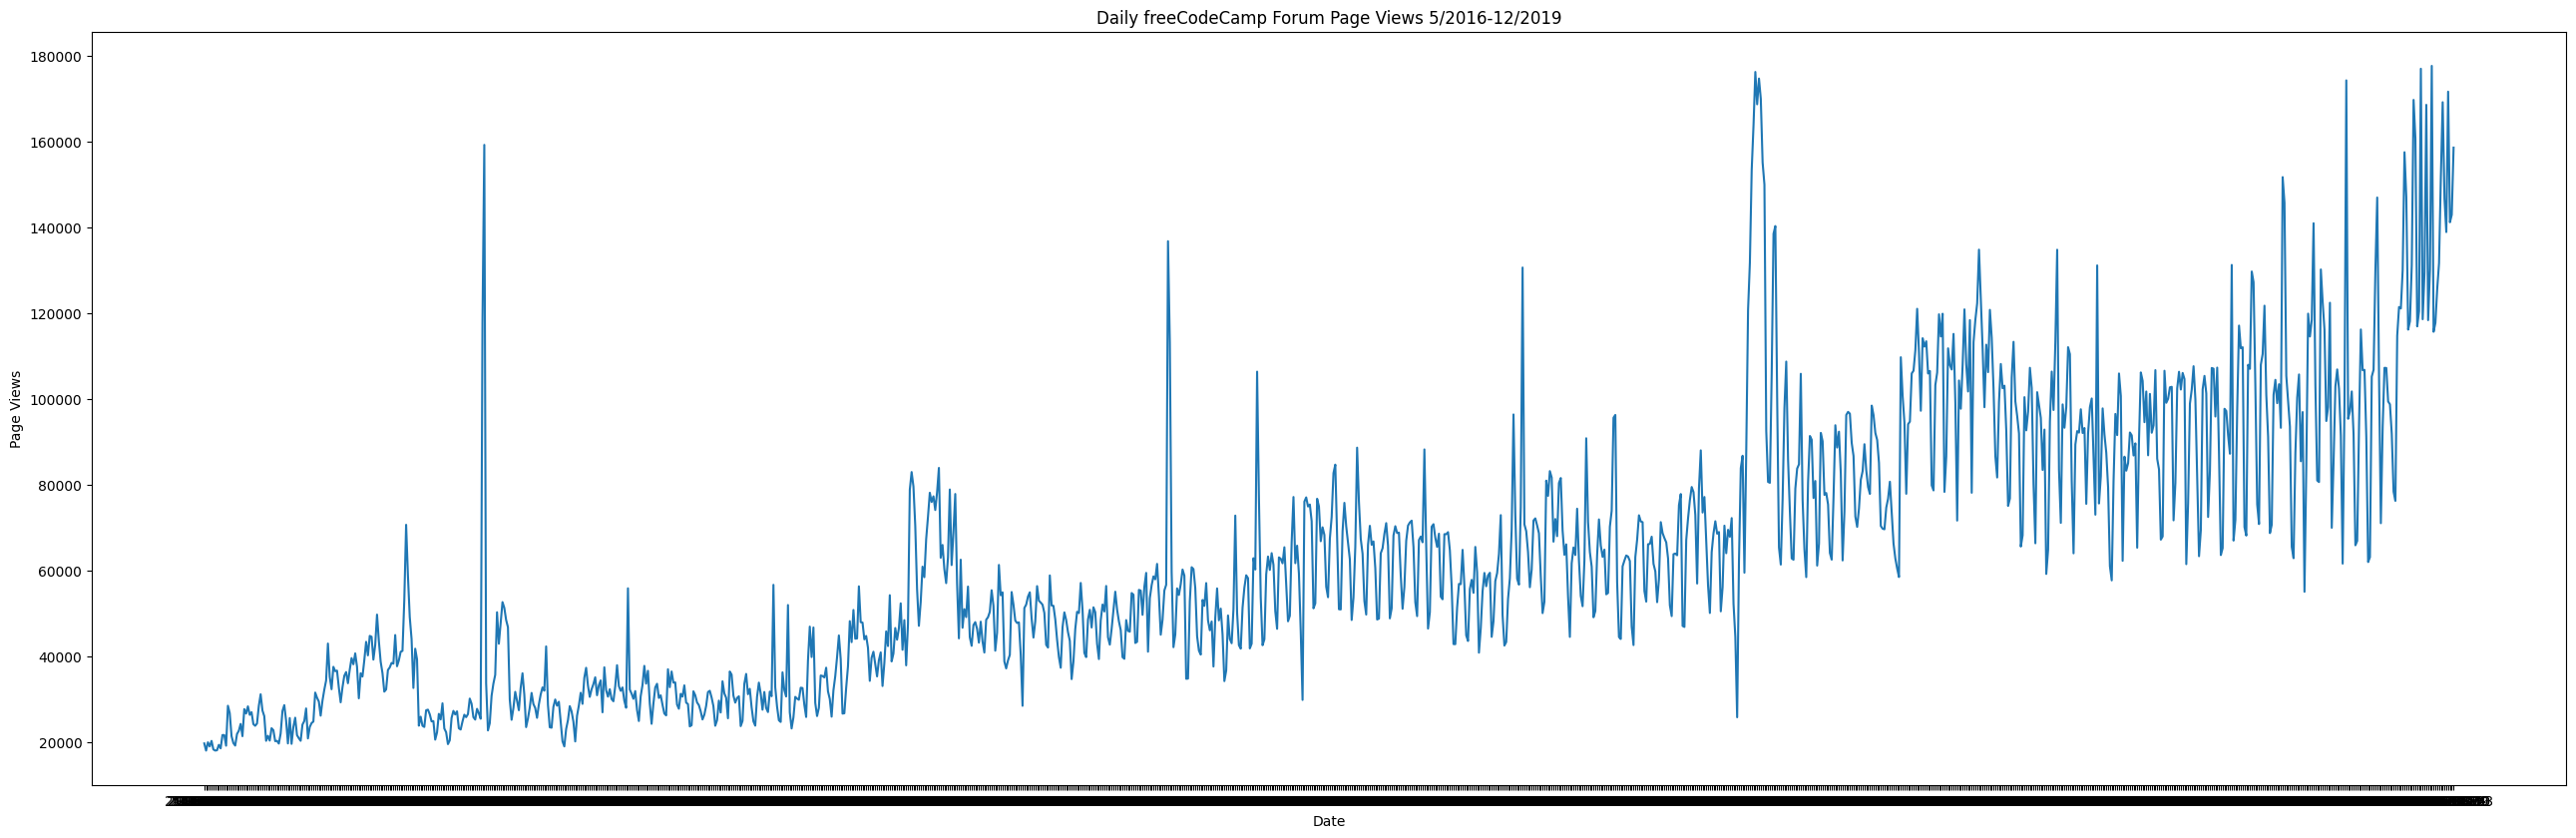

In [112]:
draw_line_plot()

In [113]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy(deep=True)


    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
    df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
    df_bar = df_bar.set_index('year')
    df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()

    df_bar = df_bar.set_index('year')
    df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
    df_bar= df_bar.fillna(0)
    

    fig, ax = plt.subplots()

    bar = df_bar.plot.bar(rot=0, ax=ax)
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

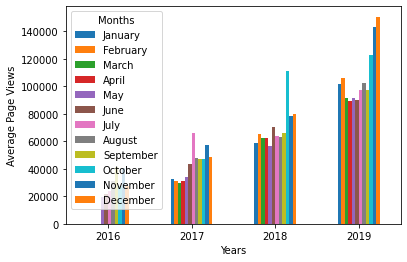

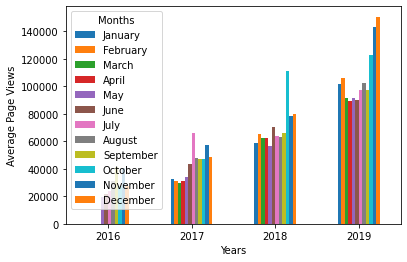

In [114]:
draw_bar_plot()

In [145]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
    df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
    
    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(15)
    fig.set_figwidth(60)

    
    sns.boxplot(ax=ax1, x="Year", y= "value", data=df_box) 
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
        
    sns.boxplot(ax=ax2, x="Month", y= "value", data=df_box) 
    
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

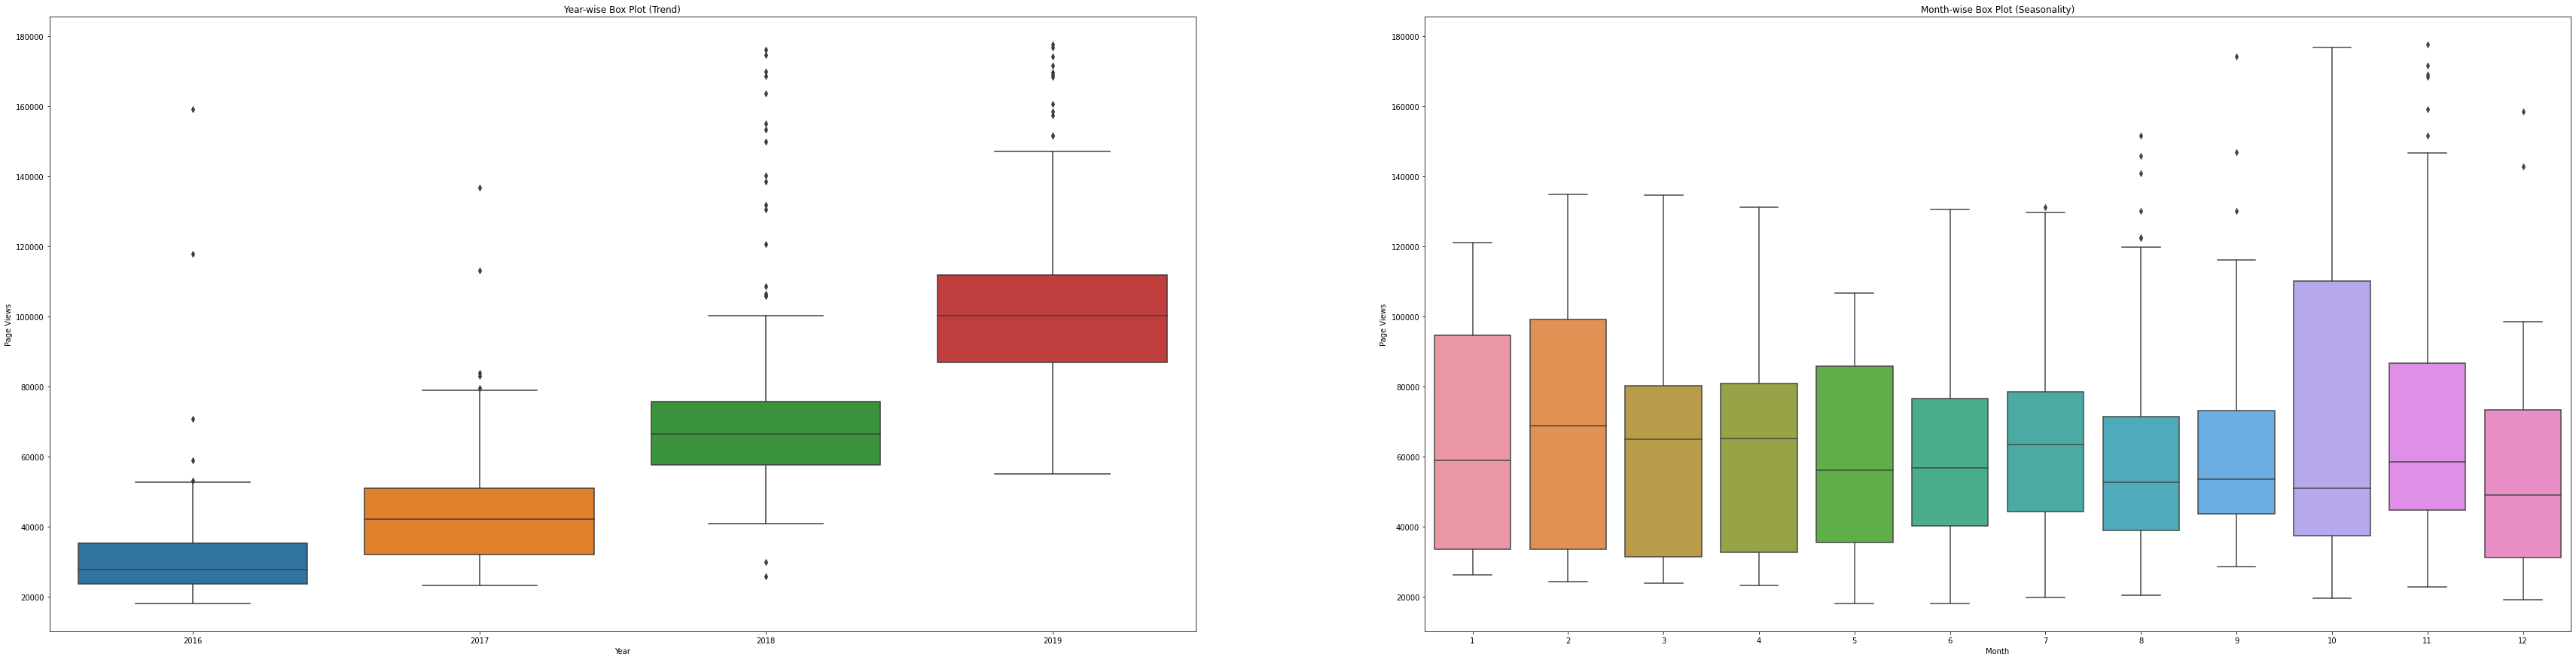

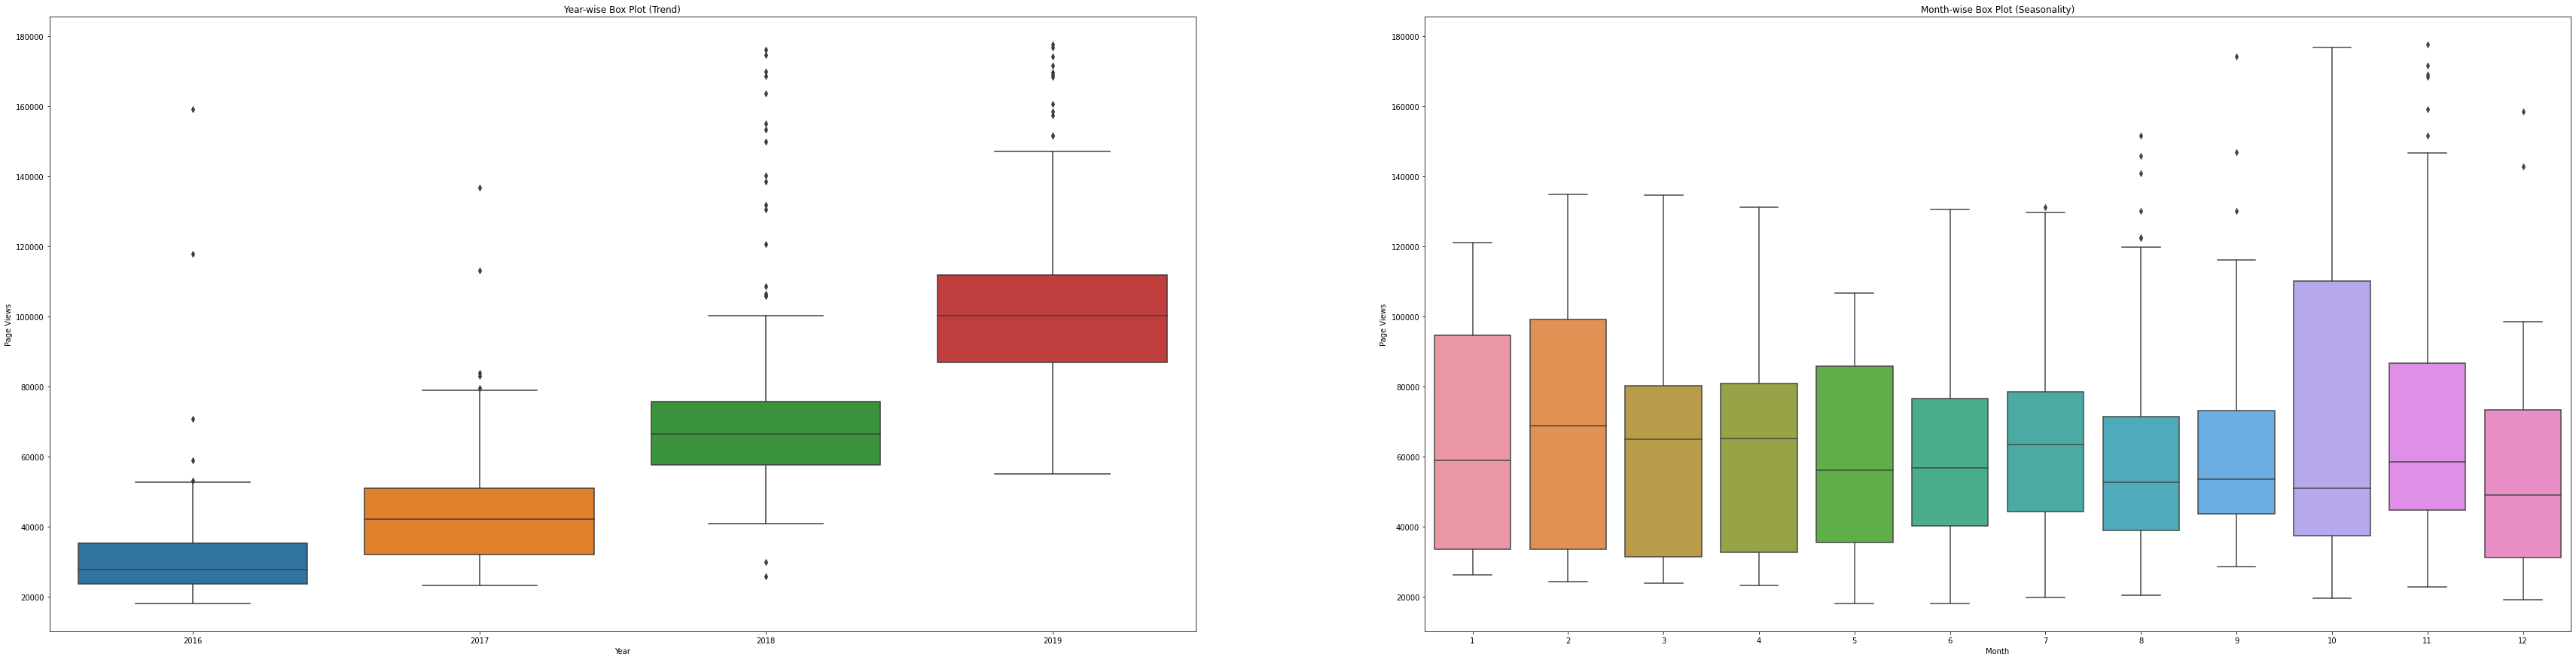

In [146]:
draw_box_plot()